In [1]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/109-2/hill_experiment/npy_depth/"
#     sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
else:
    file_path = r"G:/我的雲端硬碟/0327_align_depth/"

in linux


In [2]:
'''math tool'''
import csv
import numpy as np

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
import statistics # as sta

<U5
(480, 640)


'\ncv2.imshow("raw", npDepthF)\ncv2.waitKey(0)\ncv2.imshow("filtered", npDepthF_color)\ncv2.waitKey(0)\n# cv2.destroyAllWindows()\ncv2.destroyWindow("raw")\n'

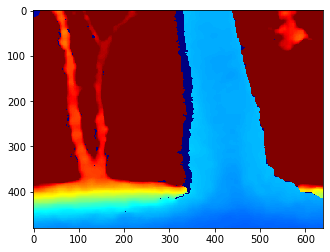

In [29]:
'''load file'''
npDepth = []

with open(file_path + 'two_tree.csv', 'r') as csvfile:
  rows = csv.reader(csvfile, delimiter=',')
  for row in rows:
    npDepth.append(row)
npDepth = np.asanyarray(npDepth)
print(npDepth.dtype) # U5 means string length < 5
print(npDepth.shape)
npDepth = npDepth.astype('uint16')

# npDepth = np.load(file_path+"tree_near.npy")

npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.04) # 6m
npDepthF_color = cv2.applyColorMap(npDepthF, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(npDepthF_color, cv2.COLOR_BGR2RGB))

'''
cv2.imshow("raw", npDepthF)
cv2.waitKey(0)
cv2.imshow("filtered", npDepthF_color)
cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.destroyWindow("raw")
'''

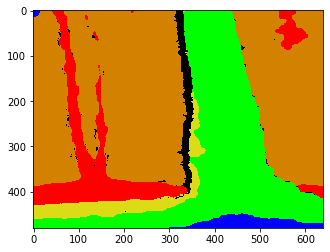

In [30]:
color_seq = ['r','yello','green','blue','black']
npDepth_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))
for i in range(480):
    for j in range(640):
        if npDepth[i][j]==0:
            npDepth_seg[i][j]=(0,0,0)
            continue
        if npDepth[i][j]<1500:
            npDepth_seg[i][j]=(255,0,0)
            continue
        if npDepth[i][j]<2000:
            npDepth_seg[i][j]=(0,255,0)
            continue
        if npDepth[i][j]<3000:
            npDepth_seg[i][j]=(22,220,220)
            continue
        if npDepth[i][j]<6000:
            npDepth_seg[i][j]=(0,0,255)
            continue
        else: 
            npDepth_seg[i][j]=(0,130,210)
            continue
npDepth_seg = npDepth_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npDepth_seg, cv2.COLOR_BGR2RGB))

In [31]:
def depth(x,y):
    return npDepth[x][y]

In [32]:
class Point3D:
    x: int = 0
    y: int = 0
    z: int = 0
cx_d = 424
cy_d = 241
fx_d = 424
fy_d = 424

npPointX = np.asarray(range(640))-cx_d
npPointX = np.diag(npPointX)
npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) + 360
npPointY = npPointY.astype('float16')
'''
npElavation = np.array([])
for i in range(480):
    for j in range(640):
        x_d = j
        y_d = i
        P3D = Point3D
        P3D.x = (x_d - cx_d) * depth(i,j) / fx_d * (-1)
        P3D.y = (y_d - cy_d) * depth(i,j) / fy_d * (-1) + 360
        P3D.z = depth(i,j)
        npElavation = np.append(npElavation, P3D.y)
npElavation = npElavation.reshape(480,-1);
npElavation.shape
'''

'\nnpElavation = np.array([])\nfor i in range(480):\n    for j in range(640):\n        x_d = j\n        y_d = i\n        P3D = Point3D\n        P3D.x = (x_d - cx_d) * depth(i,j) / fx_d * (-1)\n        P3D.y = (y_d - cy_d) * depth(i,j) / fy_d * (-1) + 360\n        P3D.z = depth(i,j)\n        npElavation = np.append(npElavation, P3D.y)\nnpElavation = npElavation.reshape(480,-1);\nnpElavation.shape\n'

In [38]:
'''plot 3D color surface'''
%matplotlib qt
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
y = np.linspace(0,479,480) # data of [:x] column
x = np.linspace(0,639,640) # data of [x:] row
X,Y = np.meshgrid(x,y)
print(npPointY.shape)
initial_cmap = cm.get_cmap('rainbow')
# reversed_cmap=initial_cmap.reversed()
surf = ax3.plot_surface(X, Y, npPointY, cmap=initial_cmap)
plt.title('Elevation mapping', fontsize='15')
plt.xlabel('X[pixel]', fontsize='15')
plt.ylabel('Y[pixel]', fontsize='15')
fig3.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

(480, 640)


In [34]:
npHeight = np.copy(npPointY)
ground_height = np.array([])
height,width = npHeight.shape
layer = 10

for i in range(height-layer*10, height):
    for j in range(width):
        if npHeight[i][j]!=0:
            ground_height = np.append(ground_height, npHeight[i][j])
            
meanGrass = statistics.mean(ground_height)
medianGrass = statistics.median(ground_height)
stdevGrass = statistics.stdev(ground_height)

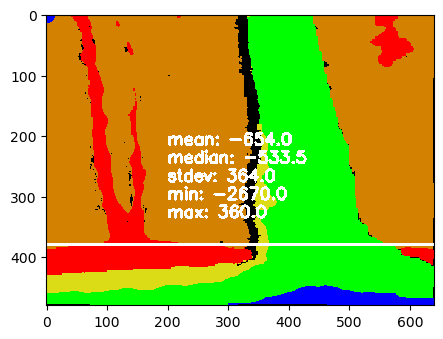

In [40]:
npDepth_seg_c = np.copy(npDepth_seg)
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'mean: '+str(np.trunc(meanGrass)), #text
            (200,200+15), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'median: '+str(medianGrass), #text
            (200,200+45), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'stdev: '+str(np.trunc(stdevGrass)), #text
            (200,200+75), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'min: '+str(np.min(ground_height)), #text
            (200,200+105), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'max: '+str(np.max(ground_height)), #text
            (200,200+135), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.line(npDepth_seg_c, (0,380),(640,380),(255,255,255),3)
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,4), dpi = 100)
plt.imshow(cv2.cvtColor(npDepth_seg_c, cv2.COLOR_BGR2RGB))

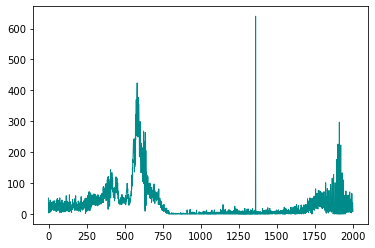

In [36]:
HOG_height = np.zeros(2000)
for i in range(height-layer*10, height):
    for j in range(width):
        index = int(npHeight[i][j]+1000)
        HOG_height[index] = HOG_height[index]+1
#plt.xlim(300,800)
plt.plot(HOG_height, linewidth=1.0, color='#008b8b', label='right')
plt.show()

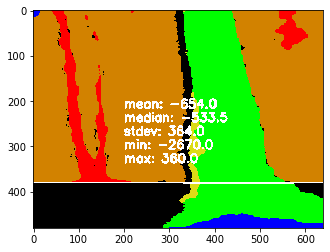

In [41]:
for i in range(height-layer*10, height):
    for j in range(width):
        if npHeight[i][j] < -500:
            npDepth_seg_c[i][j] = (0,0,0)
plt.imshow(cv2.cvtColor(npDepth_seg_c,cv2.COLOR_BGR2RGB))

In [44]:
npHeight_copy = np.copy(npHeight)
npHeight_copy = npHeight_copy.astype('float32')

ret, npHeight_copy = cv2.threshold(npHeight_copy, -500, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('binarize', npHeight_copy)
cv2.waitKey(0)

mask = np.zeros_like(npHeight_copy)   
layer = 10
region_of_interyest_vertices = [(0, height-layer*10),(width, height-layer*10),(width,height),(0,height)] 
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32),255)
masked_img = cv2.bitwise_and(npHeight_copy, mask)
cv2.imshow('threshold3', masked_img)
cv2.waitKey(0)


'''
ret, masked_img = cv2.threshold(masked_img, 170, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold4', masked_img)
cv2.waitKey(0)
'''
cv2.destroyAllWindows()